In [1]:
# a useful link
#  https://scikit-learn.org/stable/modules/model_evaluation.html
#special request as promised

In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('Real estate.csv')
data.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [3]:
data.head() # lets predict `Y house price unit area`
# remember that removing `No` column can increase your result

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
data.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [5]:
y =data.iloc[:,-1]

In [6]:
data.drop('Y house price of unit area', axis=1, inplace=True)  # drop columns

In [7]:
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067


In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,y,test_size=0.2,random_state=2)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
y_train

228    46.6
157    35.6
175    36.5
284    34.4
100    38.2
       ... 
299    46.1
22     24.6
72     36.3
15     50.5
168    37.4
Name: Y house price of unit area, Length: 331, dtype: float64

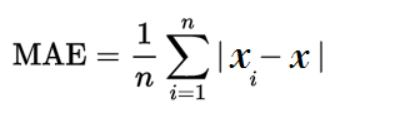

In [9]:
from IPython.display import Image
Image(filename='mae.jpg')  # Never use accuracy or confusion matrix when you have Regression task!

In [10]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 5.9812519106285285


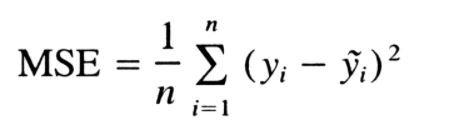

In [11]:
from IPython.display import Image
Image(filename='mse.jpg') 

In [12]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 107.45657447745305


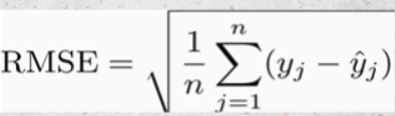

In [13]:
from IPython.display import Image
Image(filename='rmse.jpg') 

In [14]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 10.366126300477582


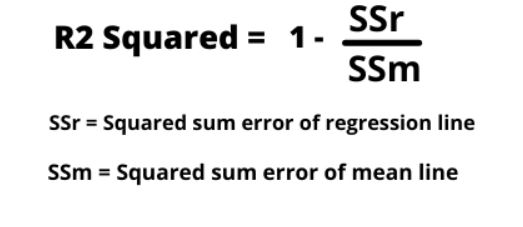

In [15]:
from IPython.display import Image
Image(filename='r2.jpg')

In [16]:
from sklearn.metrics import r2_score  # It explains how well a model performs when replicating the observed outcomes
r2 = r2_score(y_test,y_pred)
print(r2)  #remember its near to 1 meaning its good 

0.5152898373983719


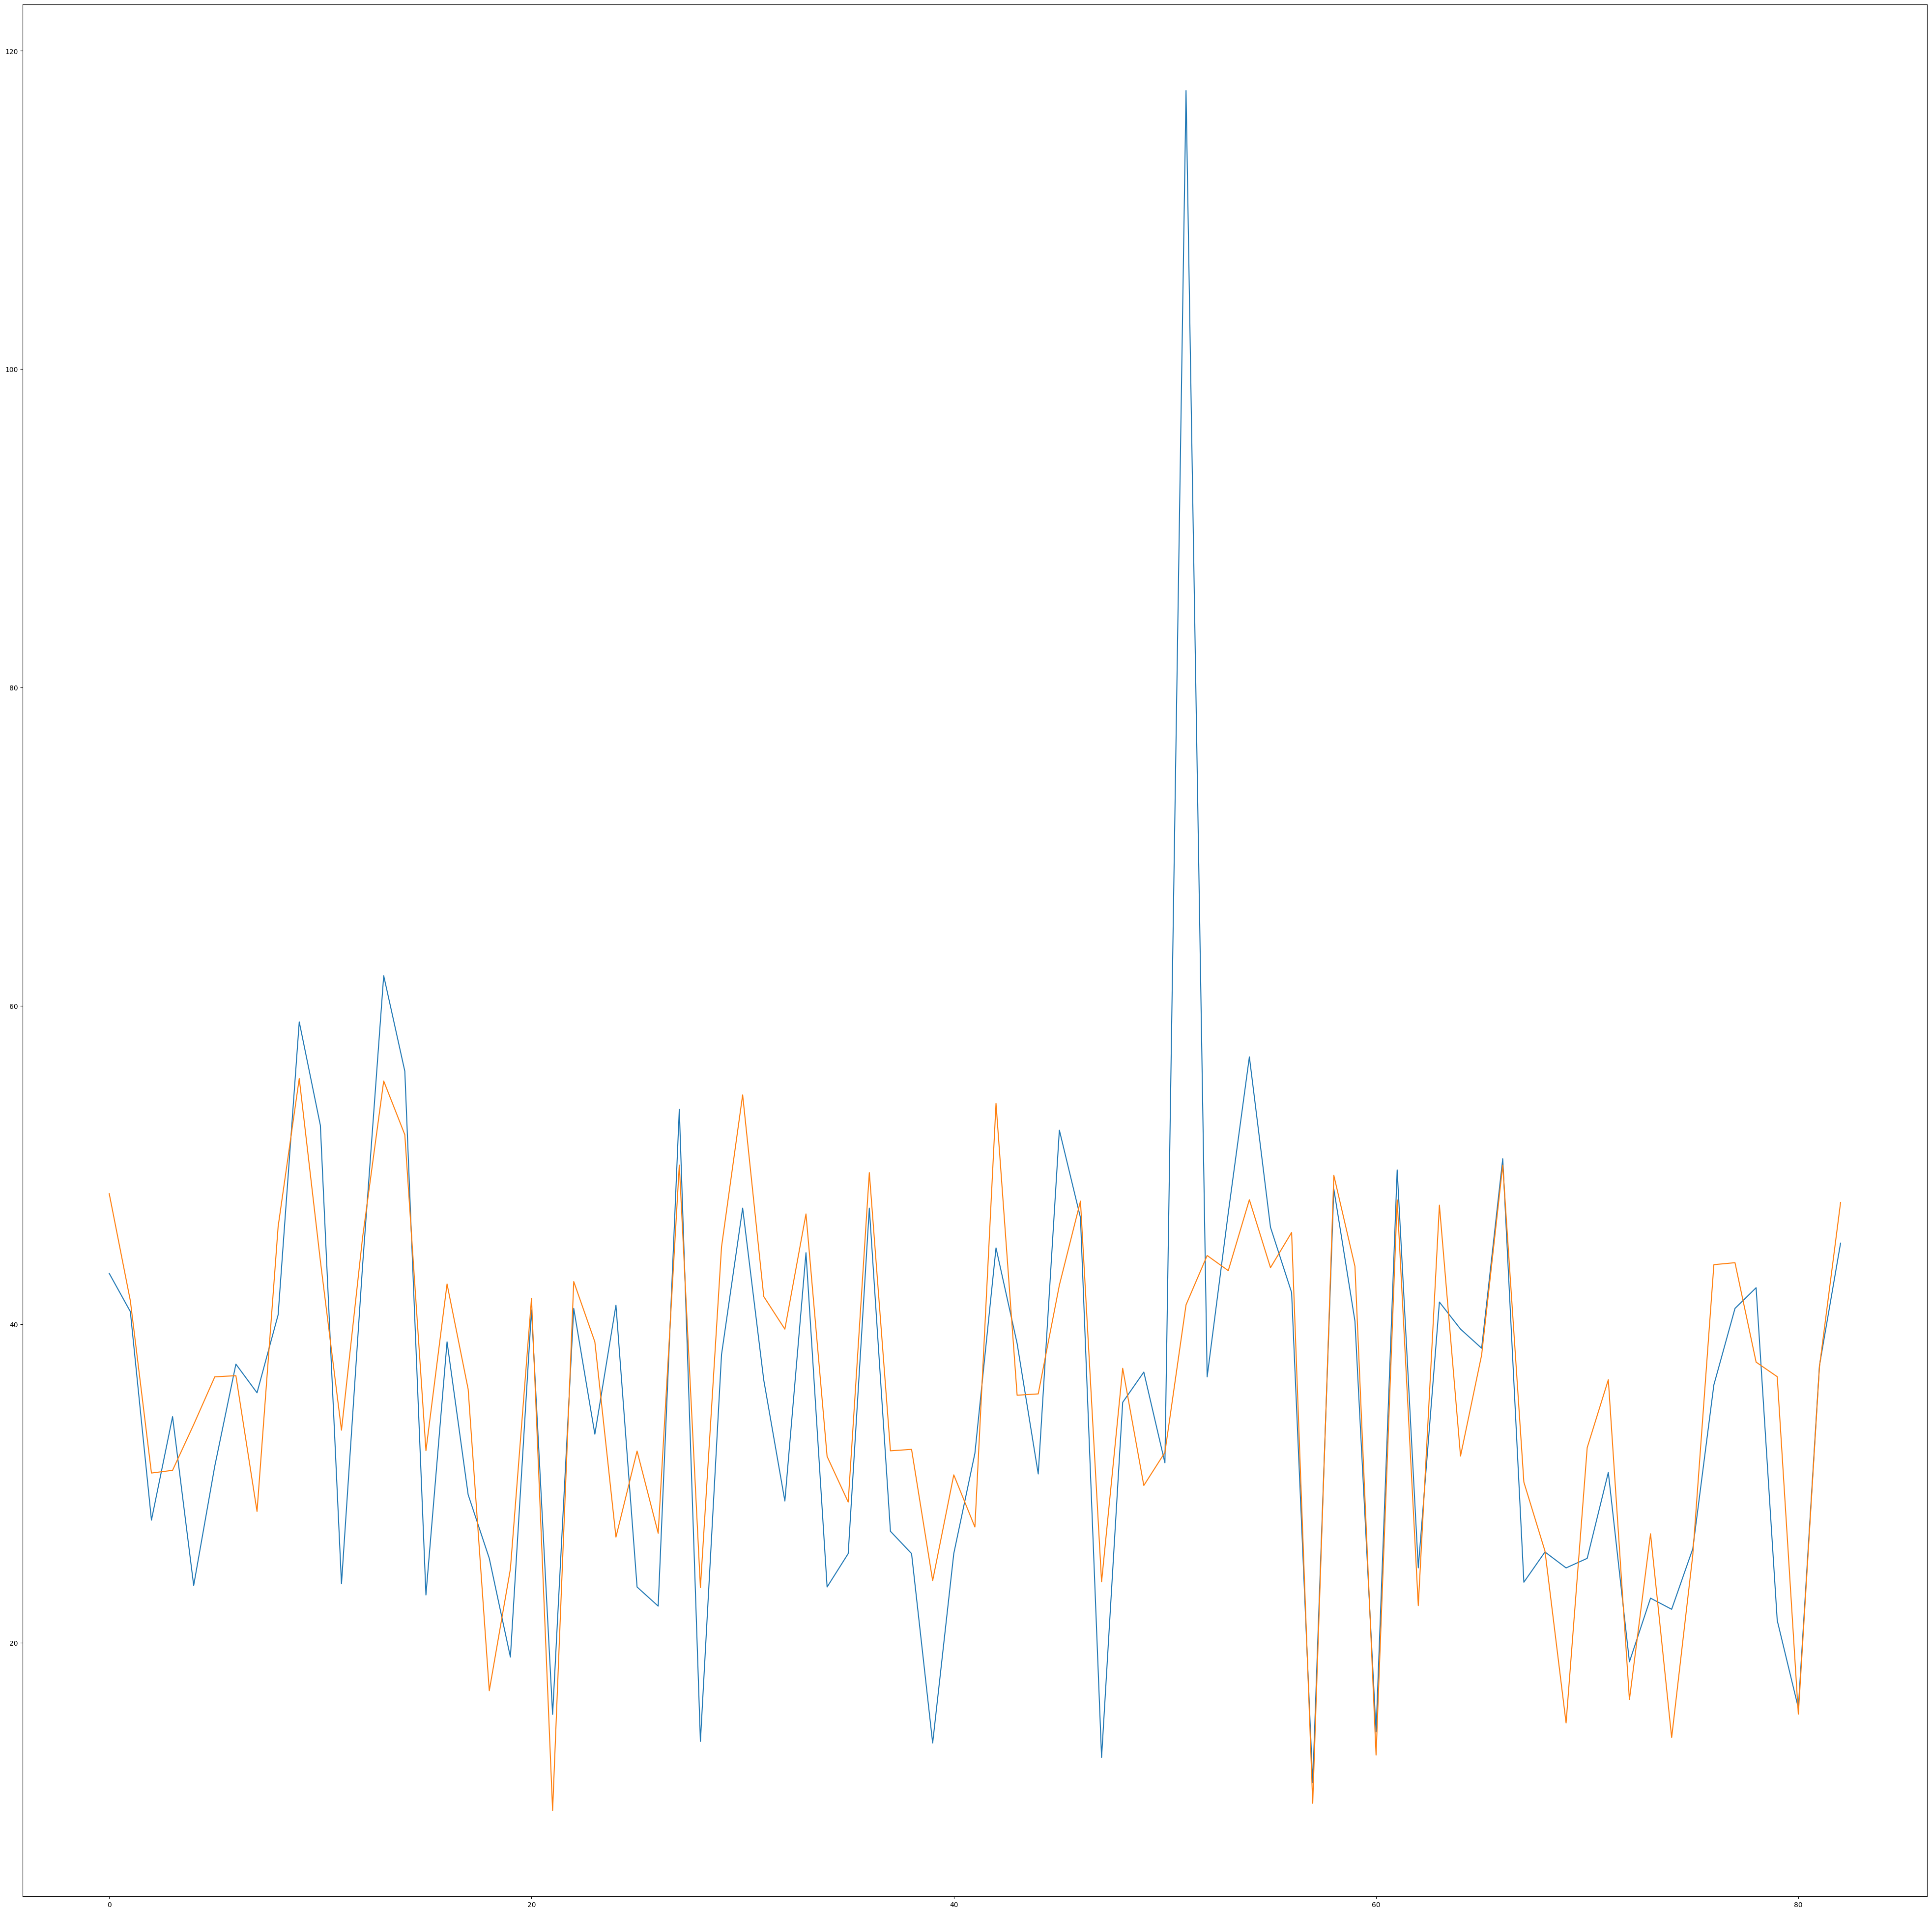

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(50,50))
plt.plot(y_test.to_numpy(dtype=object)[:100])
plt.plot(y_pred[:100])

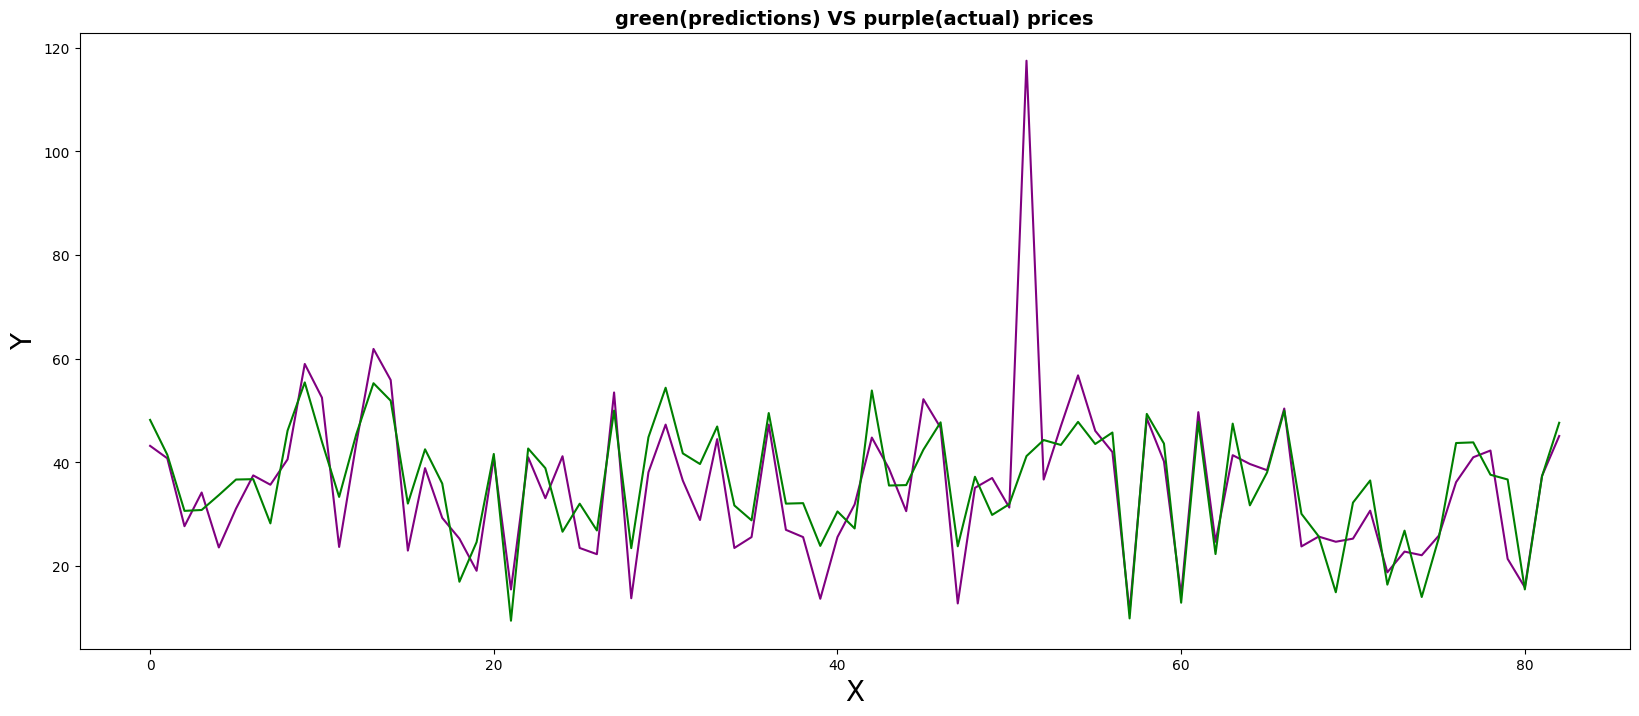

In [18]:
plt.figure(figsize = (20, 8))
plt.plot(y_test.to_numpy(dtype=object)[:100], color = "purple")
plt.plot(y_pred[:100], color = "green")
plt.title("green(predictions) VS purple(actual) prices", fontsize = 14, fontweight = "bold") #updated here
plt.ylabel("Y",fontsize = 20)
plt.xlabel("X",fontsize = 20)

plt.show()

In [19]:
#PERHAPS YOU ARE BORED OF STUPID LINEAR REGRESSION, LETS TRY SOMETHING COOL

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
gbr_y_predict = gbr.predict(X_test)

print("R-squared value of GradientBoostingRegressor: {sc}".format(sc = gbr.score(X_test, y_test)))
print("The mean squared error of GradientBoostingRegressor: {}".format(mean_squared_error(y_test, gbr_y_predict)))
print("The mean absoluate error of GradientBoostingRegressor: {}".format(mean_absolute_error(y_test,gbr_y_predict)))

R-squared value of GradientBoostingRegressor: 0.5808306718298515
The mean squared error of GradientBoostingRegressor: 92.92666753554101
The mean absoluate error of GradientBoostingRegressor: 4.502573404295385


Text(0.5, 1.0, 'The result of GradientBoostingRegressor')

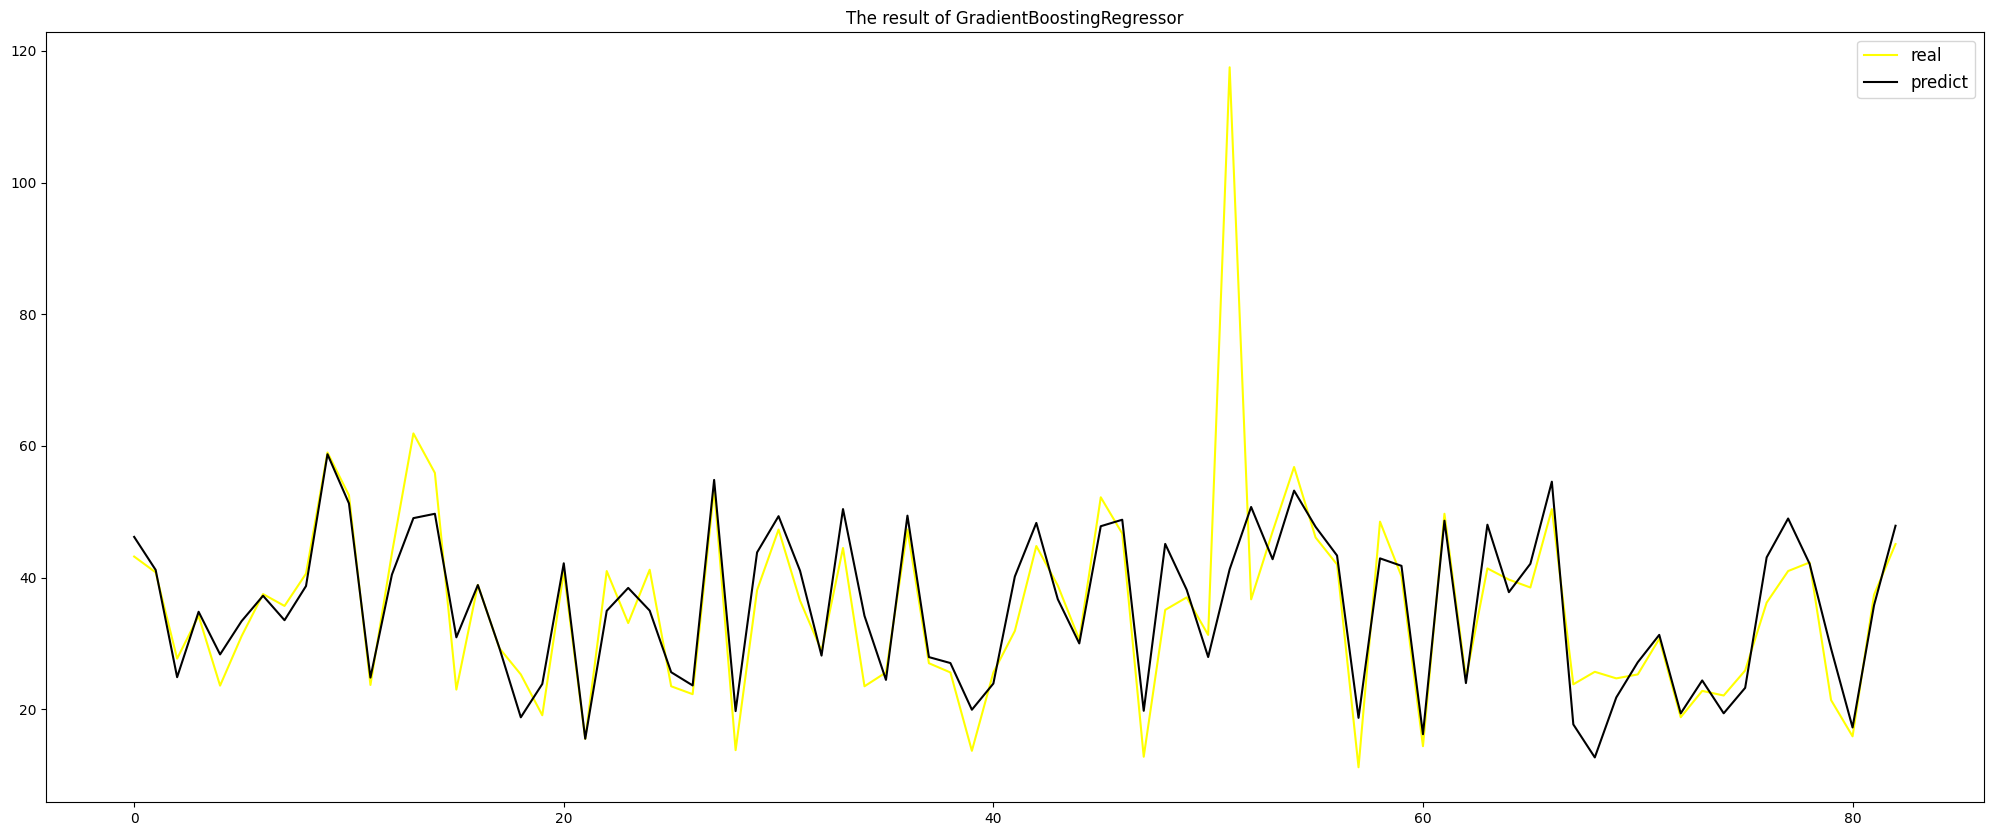

In [21]:
plt.figure(figsize=(25,10))
plt.plot(y_test.to_numpy(dtype=object)[:100],c='yellow')
plt.plot(gbr_y_predict[:100],c='black')  #predicts
plt.legend(['real','predict'],fontsize="large")
plt.title('The result of GradientBoostingRegressor')

In [22]:
#perhaps lets add MINMAX SCALING AND SEE WHATS GONNA HAPPEEN

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(data=scaler.transform(X_train),columns = X_train.columns,index=X_train.index)
X_test = pd.DataFrame(data=scaler.transform(X_test),columns = X_test.columns,index=X_test.index)

In [24]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=500)
rfr.fit(X_train,y_train)
rfr_y_predict = rfr.predict(X_test)

print("R-squared value of RandomForestRegressor: {sc}".format(sc = rfr.score(X_test, y_test)))
print("The mean squared error of RandomForestRegressor: {}".format(mean_squared_error(y_test, rfr_y_predict)))
print("The mean absoluate error of RandomForestRegressor: {}".format(mean_absolute_error(y_test,rfr_y_predict)))
#BETTER

R-squared value of RandomForestRegressor: 0.5931329391250277
The mean squared error of RandomForestRegressor: 90.19934798698816
The mean absoluate error of RandomForestRegressor: 4.216614457831316


Text(0.5, 1.0, 'The result of RandomForestRegressor')

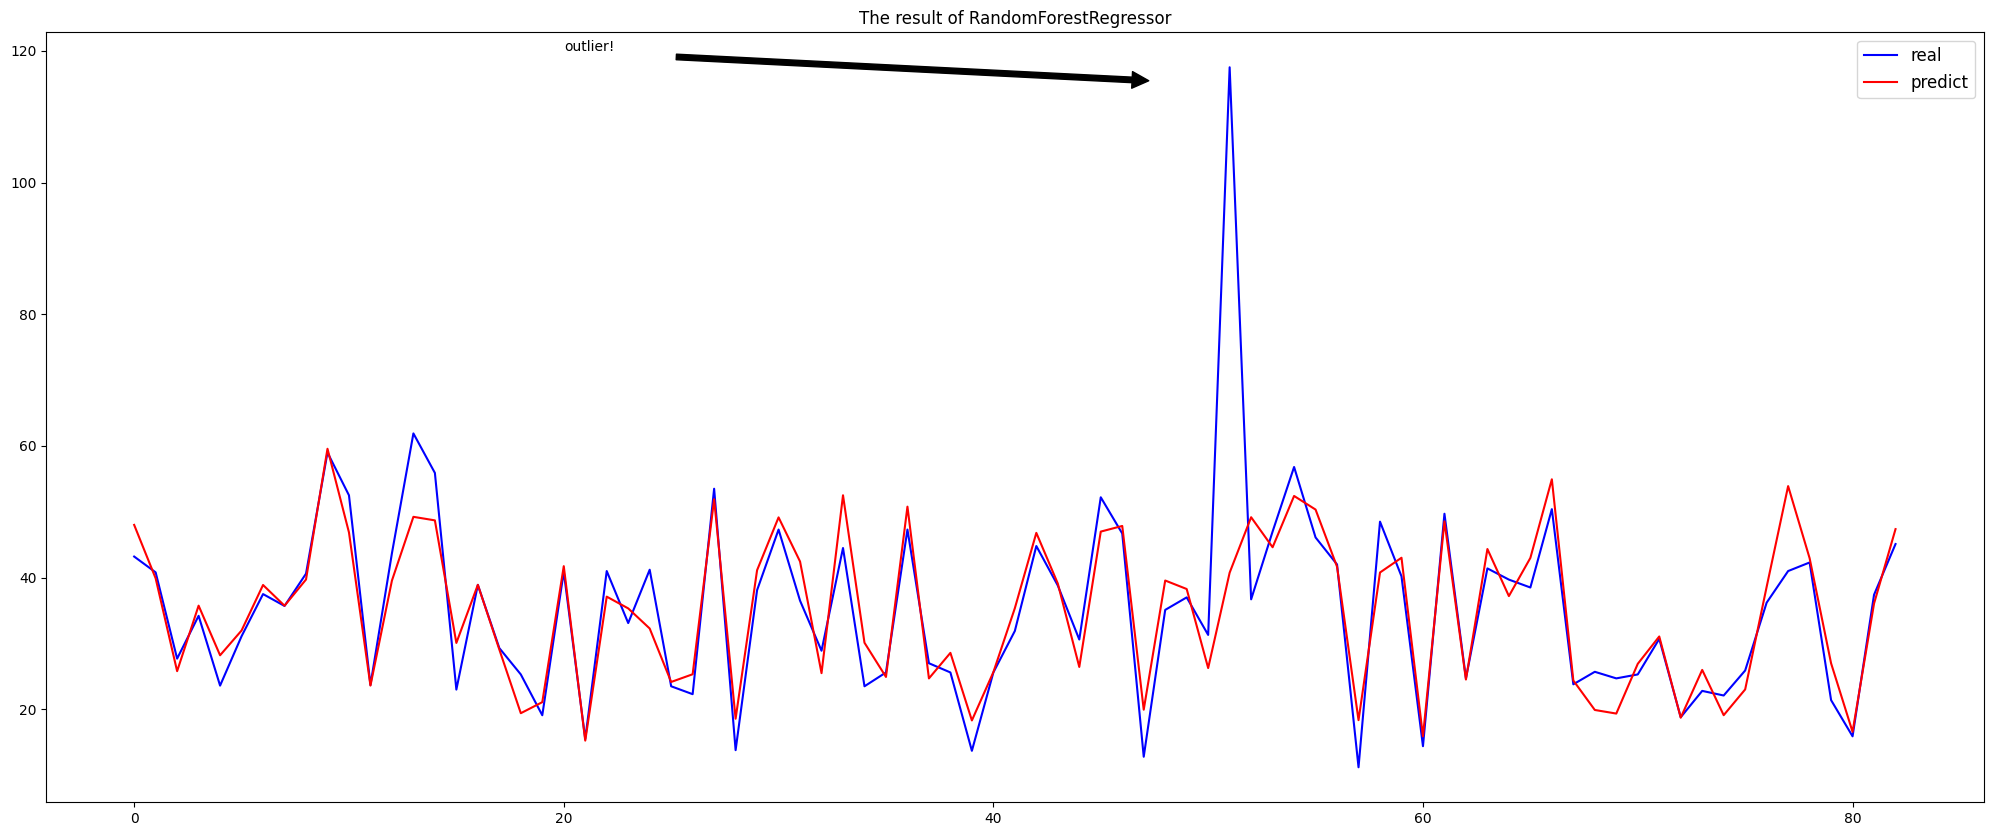

In [25]:
plt.figure(figsize=(25,10))
plt.plot(y_test.to_numpy(dtype=object)[:200],c='blue')
plt.plot(rfr_y_predict[:200],c='red')
plt.annotate(
# Label and coordinate
'outlier!', xy=(50, 115), xytext=(20, 120),

# Custom arrow
arrowprops=dict(facecolor='black', shrink=0.1)
)
plt.legend(['real','predict'],fontsize="large")
plt.title('The result of RandomForestRegressor')

In [26]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('______')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [27]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)  # maybe parameter tuning
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)


print('Testing set evaluation:\n______')
print_evaluate(y_test, test_pred)
print('==*******==')
print('Training set evaluation:\n_____')
print_evaluate(y_train, train_pred)
#congratulations

Testing set evaluation:
______
MAE: 4.220561445783123
MSE: 89.12416874578297
RMSE: 9.440559768667478
R2 Square 0.5979828080824624
______
==*******==
Training set evaluation:
_____
MAE: 1.808112688821738
MSE: 6.5322622681872735
RMSE: 2.5558290764813036
R2 Square 0.9623199784189748
______


Text(0.5, 1.0, 'The result of RandomForestRegressor')

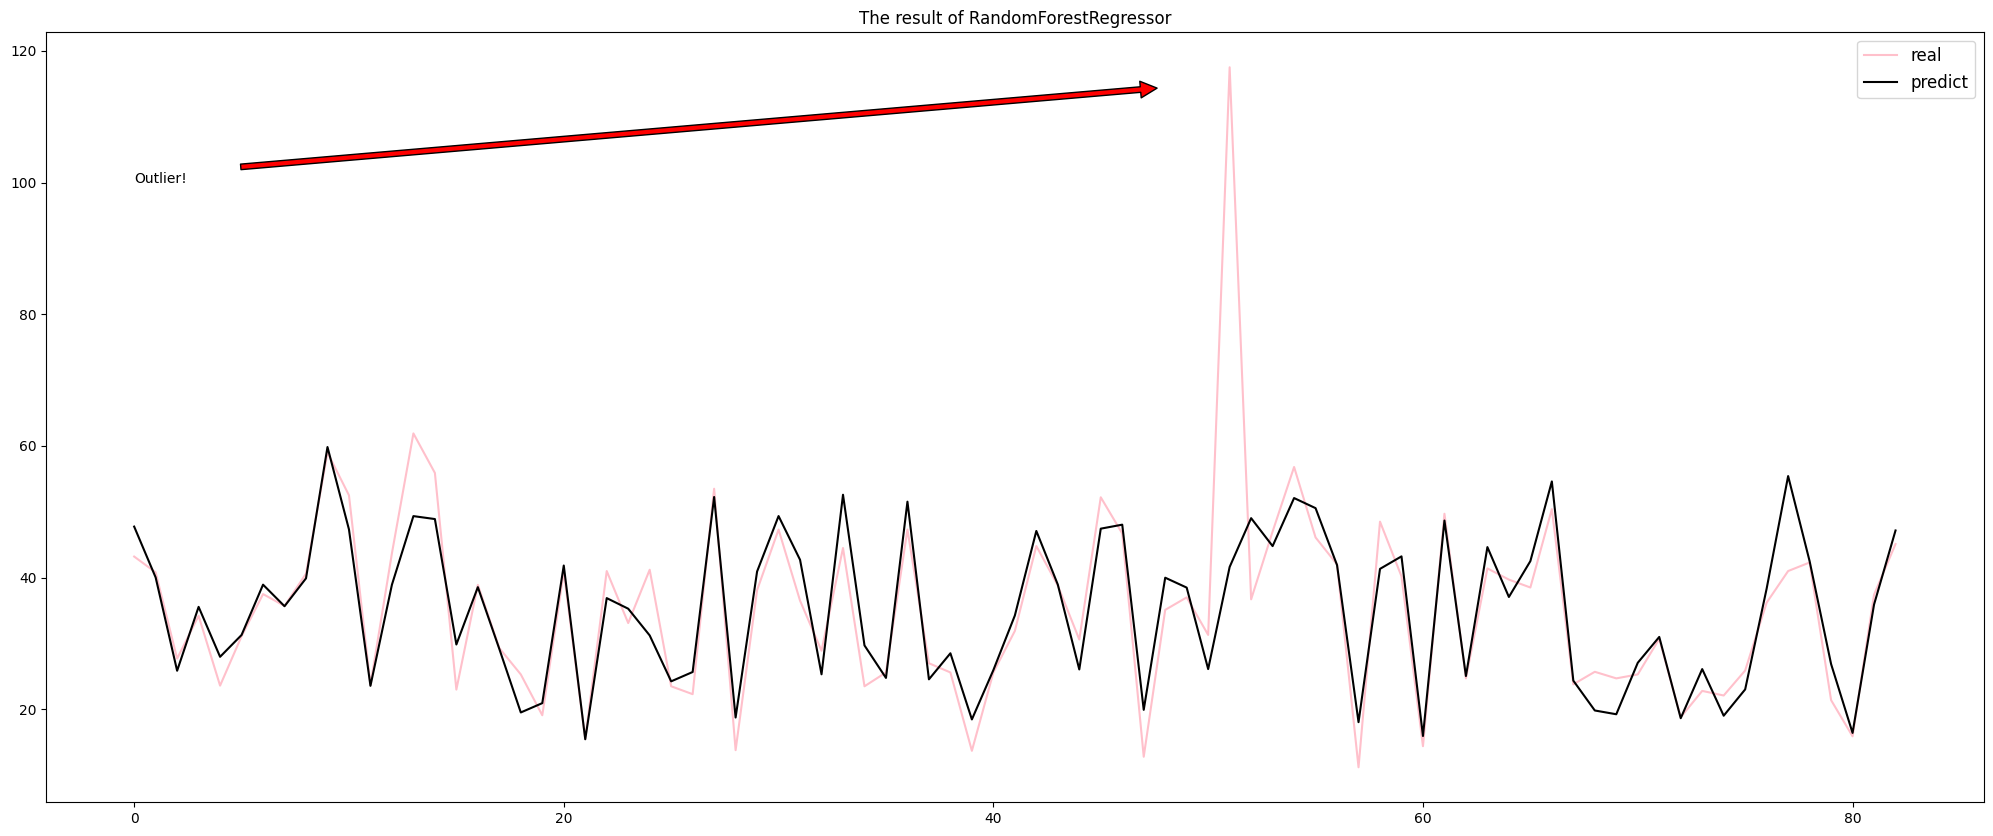

In [28]:
plt.figure(figsize=(25,10))
plt.plot(y_test.to_numpy(dtype=object)[:100],c='pink')
plt.plot(test_pred[:100],c='black')  #predicts
plt.annotate(

'Outlier!', xy=(50, 115), xytext=(0, 100),
 
# Custom arrow
arrowprops=dict(facecolor='red', shrink=0.05)
)
plt.legend(['real','predict'],fontsize="large")
plt.title('The result of RandomForestRegressor')